In [1]:
!pip install easyocr
!pip install imutils
!pip install plyer
# read the further module in google 


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import cv2
#cv2 module uses for frame gray scale countors and canny edges
from matplotlib import pyplot as plt
#plotting the plate test image
import numpy as np
#creating array for using numpy
import imutils
#used to handle the camera framing
import easyocr
#optical character recozigion
from datetime import date
#using the data and time creating for the dataframe
import pandas as pd
#used for reading the exiting dataframe
from datetime import datetime
# from IPython.display import Audio
from plyer import notification
#used for creating the notification bar

In [3]:

list1=[]
list2=[]
list3=[]
#creating list for handling the entry in the dataframe and used for binary search for finding the dataframe belongs to society or not

In [4]:

# list1=[]
# list2=[]
# list3=[]

def capture():
    camera = cv2.VideoCapture(0)
    i = 0
    while i < 5:
    #     raw_input('Press Enter to capture')
        return_value, image = camera.read()
        cv2.imwrite('image_'+str(i)+'.jpg', image)
        i += 1
    del(camera)
#function for capturing the frame of live car number and creating different frame which is used for extracting the car plate test

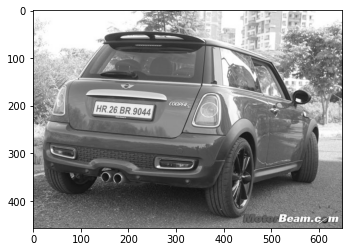

In [5]:
# importing the python open cv library
capture()
img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
#reading the image and coverting it into gray scale for reducing countors and parameters for noisy image

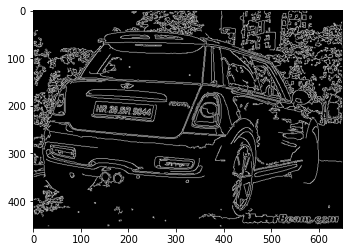

In [6]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
#used for filtering the image and coverting it into countor and edges for reducing the parameters

In [7]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

#used for finding the contours 

In [8]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
        
#used for coverting array by making loop or array coversion

In [9]:
location
#finding the location of array

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [10]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
#used for coverting numpy arrays of image for calculation in the image

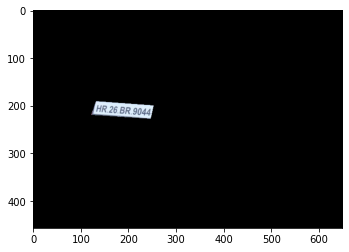

In [11]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
#show the extracted image

In [12]:
#plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [13]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+5, y1:y2+5]
th3 = cv2.adaptiveThreshold(cropped_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

#threshold adaptive used for coverting the image into binary format
#Thresholding is a very popular segmentation technique, 
#used for separating an object considered as a foreground from its background.

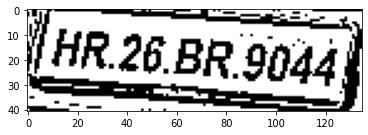

In [14]:
plt.imshow(cv2.cvtColor(th3, cv2.COLOR_BGR2RGB))



In [19]:
reader = easyocr.Reader(['en'])
result = reader.readtext(th3)
result
#reading the test and stored into result 

def getdate():
    now = date.today()
    return now.strftime("%d/%m/%Y ")
    list_fun()
#function for getting date
def gettime():
    n= datetime.now()

    return n.strftime("%H:%M:%S")
#function for getting time
def notifyMe(title, message):
    notification.notify(
        title = title,
        message = message,
        app_icon = "alert.ico",
        timeout = 6
    )

#function for generating the notification bar 
# import pandas as pd
data=pd.read_csv("entry.csv")
data.head()
#used for reading the entry csv with the help of pandas


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\users\mita\appdata\local\programs\python\python39\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
c:\users\mita\appdata\local\programs\python\python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\users\mita\appdata\local\programs\python\python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


,name
0,HR26BR9044


In [17]:
special_string=result[0][-2]
sample_list=[]
# Iterate over the string using a for loop
for i in special_string:
# Check if the character in the list is not special
    if i.isalnum():
# If the character is not special, add it to list
        sample_list.append(i)
# Join the elements in the list to create a string
normal_string="".join(sample_list)
print(normal_string)
#sorting the extracted image in the test by using slicing 

ntitle= "ALERT ALARM "
nmessage="CAR NUMBER NOT BELONG TO SOCIETY KINDLY CHECK FOR SAFETY PURPOSE"
# song=r'/content/note.mp3'
# print('playing sound using  pydub')
# play(song)
list1.append(normal_string)
list2.append(getdate())
list3.append(gettime())
df = pd.DataFrame(list(zip(list1, list2,list3)),
               columns =['numer', 'date','time'])
df
#creating the dataframe of entered car by using detection with date and time

HR26BR9044


,numer,date,time
0,HR26BR9044,02/01/2023,22:28:07


In [ ]:

# df.to_csv('saved.csv')



In [ ]:
number=(data["name"]).to_list()
print(number)
#list for entry dataframe cars which belong to society

In [ ]:
if test in number:
    df = pd.DataFrame(list(zip(list1, list2,list3)),
               columns =['numer', 'date','time'])

else:
    df1 = pd.DataFrame(list(zip(list1)),
               columns =['number2'])

    print("ping the alarm")
  # Audio(data=song,autoplay=False)
    
    notifyMe(ntitle,nmessage)


#if else function for find belonging car in the society and cars which is not belong to society


In [ ]:

df.to_csv("saved.csv")
#generating the csv file of the dataframe

In [ ]:
def list_fun():
    list1=[]
    list2=[]
    list3=[]